# Travel insurance Project

## About the dataset

The dataset contains information collected on 2000 clients who purchased travel insurance for a certain company in 2019. The Company is now interested in building a model that can predict whether a client will purchase travel insurance or not.

## Columns

- **Age**- Age Of The Customer
- **Employment Type**- The Sector In Which Customer Is Employed
- **GraduateOrNot**- Whether The Customer Is College Graduate Or Not
- **AnnualIncome**- The Yearly Income Of The Customer In Indian Rupees[Rounded To Nearest 50 Thousand Rupees]
- **FamilyMembers**- Number Of Members In Customer's Family
- **ChronicDisease**- Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.
- **FrequentFlyer**- Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years[2017-2019].
- **EverTravelledAbroad**- Has The Customer Ever Travelled To A Foreign Country[Not Necessarily Using The Company's Services]
- **TravelInsurance**- Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

## Goal

The goal of this project is to build a model that can predict whether a client will purchase travel insurance or not based on the provided features. The model should be able to generalize well to unseen data.

## Project Oultine

1. **[Data Preprocessing](#data-preprocessing)**: Import and clean the dataset, handle missing values, duplicates, and outliers.
2. **[Exploratory Data Analysis (EDA)](#eda)**: Analyze the dataset to understand the distribution of features, relationships between features, and the target variable.
3. **[Feature Engineering](#feature-engineering)**: Create new features if necessary, encode categorical variables, and scale numerical features.
4. **[Model Selection and Training](#model-selection-and-training)**: Choose appropriate machine learning models and train them on the training set.
5. **[Model Evaluation](#model-evaluation)**: Evaluate the models using appropriate metrics, tune hyperparameters, and select the best model.
6. **[Model Ensembling](#model-ensembling)**: Combine at least two models to improve performance.
6. **[Conclusion](#summary-and-conclusion)**: Summarize the findings, model performance, and potential improvements for future work.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    VotingClassifier,
)
from sklearn.preprocessing import LabelBinarizer, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    f1_score,
    precision_score,
    recall_score,
    classification_report,
    precision_recall_curve,
    PrecisionRecallDisplay,
)
from sklearn.feature_selection import chi2, SelectFpr
import statsmodels.api as sm
import scipy.stats as stats
import plotly.express as px
import plotly.io as pio
import functions

from sklearn import set_config
import warnings

warnings.filterwarnings("ignore")
set_config(transform_output="pandas")
sns.set_theme(style="ticks")
pio.renderers.default = "svg"

# Data preprocessing

Importing the data:

In [2]:
travel_df = pd.read_csv("TravelInsurancePrediction.csv", index_col=0)
travel_df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


There are 1987 rows and 9 columns in the dataset, out of which 8 are features and one is the target variable.

Data types:

In [3]:
travel_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 155.2+ KB


From the data types, we can see that the ChronicDiseases and TravelInsurance columns are represented as binary, however the information they represent is categorical so I will be converting it to yes/no format.

In [4]:
travel_df.ChronicDiseases = travel_df.ChronicDiseases.apply(
    lambda x: "Yes" if x == 1 else "No"
)
travel_df.TravelInsurance = travel_df.TravelInsurance.apply(
    lambda x: "Yes" if x == 1 else "No"
)

numerical_features = travel_df.select_dtypes(include=np.number).columns.tolist()
categorical_features = travel_df.select_dtypes(exclude=np.number).columns.tolist()

print(
    "Numerical Features:",
    *numerical_features,
    "\nCategorical Features:",
    *categorical_features
)

Numerical Features: Age AnnualIncome FamilyMembers 
Categorical Features: Employment Type GraduateOrNot ChronicDiseases FrequentFlyer EverTravelledAbroad TravelInsurance


In [5]:
print(
    "There are no missing data."
    if travel_df.isnull().sum().sum() == 0
    else "There are missing data."
)

There are no missing data.


In [6]:
dups = travel_df.duplicated().sum()
print(
    "There are no duplicates."
    if dups == 0
    else f"There are {dups} duplicates which make {dups/len(travel_df) * 100:.2f}% of the dataset."
)

There are 738 duplicates which make 37.14% of the dataset.


Let's have a look at the duplicates:

In [7]:
travel_df[travel_df.duplicated(keep=False)].sort_values(
    travel_df.columns.to_list()
).head(10)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
184,25,Government Sector,Yes,750000,3,No,No,No,No
724,25,Government Sector,Yes,750000,3,No,No,No,No
629,25,Private Sector/Self Employed,No,600000,4,No,Yes,No,No
1013,25,Private Sector/Self Employed,No,600000,4,No,Yes,No,No
1898,25,Private Sector/Self Employed,No,600000,4,Yes,Yes,No,No
1905,25,Private Sector/Self Employed,No,600000,4,Yes,Yes,No,No
359,25,Private Sector/Self Employed,No,1150000,3,No,No,No,No
1315,25,Private Sector/Self Employed,No,1150000,3,No,No,No,No
1633,25,Private Sector/Self Employed,No,1150000,3,No,Yes,No,No
1645,25,Private Sector/Self Employed,No,1150000,3,No,Yes,No,No


Since we do not have any infromation on the way the data was collected it is hard to make a judgement on whether the duplicates represent genuine data points or they are just repeated entries of the same customer. 

To pass a judgement on this, I will be focusing on the AnnualIncome column, which seems to be rounded to the nearest thousand rupees. If the data was indeed rounded, it is possible that two (or more) customers with the same income could be represented as duplicates in the dataset.

Therefore, in my opinion the duplicates are not a problem in this case, as they are data collected from different customers and it is posible that they emerged due to rounding.

Let's check for outliers:

In [8]:
outlier_df = functions.find_outliers_iqr(travel_df)
outlier_num = outlier_df.sum().sum()

print(
    "There are no outliers."
    if outlier_num == 0
    else f"There are {outlier_num} outliers which make {outlier_num / len(travel_df) * 100:.2f}% of the dataset."
)

There are no outliers.


Descriptive statistics:

In [9]:
travel_df.describe(include="all")

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987.000000,1987,1987,1.987000e+03,1987.000000,1987,1987,1987,1987
unique,NaN,2,2,NaN,NaN,2,2,2,2
top,NaN,Private Sector/Self Employed,Yes,NaN,NaN,No,No,No,No
freq,NaN,1417,1692,NaN,NaN,1435,1570,1607,1277
mean,29.650226,NaN,NaN,9.327630e+05,4.752894,NaN,NaN,NaN,NaN
std,2.913308,NaN,NaN,3.768557e+05,1.609650,NaN,NaN,NaN,NaN
min,25.000000,NaN,NaN,3.000000e+05,2.000000,NaN,NaN,NaN,NaN
25%,28.000000,NaN,NaN,6.000000e+05,4.000000,NaN,NaN,NaN,NaN
50%,29.000000,NaN,NaN,9.000000e+05,5.000000,NaN,NaN,NaN,NaN
75%,32.000000,NaN,NaN,1.250000e+06,6.000000,NaN,NaN,NaN,NaN


Observations:

- The numerical data needs to be scaled, as the AnnualIncome and Age columns have a large range of values compared to the other columns.
- The categorical columns are all binary.

# EDA

Let's check the distribution of the numerical features:

### 1. Age:

Age mean: 29.65
Age median: 29.0


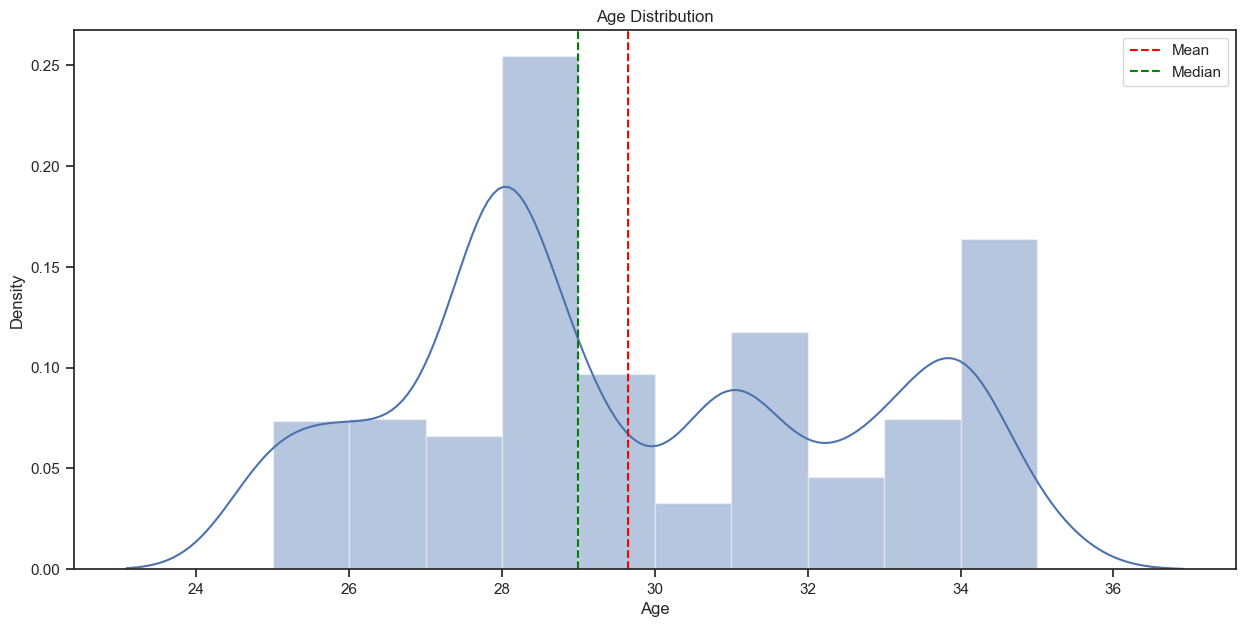

In [10]:
plt.figure(figsize=(15, 7))
_ = sns.distplot(travel_df.Age, bins=10)
plt.title("Age Distribution")
plt.axvline(travel_df.Age.mean(), color="red", linestyle="--", label="Mean")
plt.axvline(travel_df.Age.median(), color="green", linestyle="--", label="Median")
plt.legend()
print("Age mean:", round(travel_df.Age.mean(), 2))
print("Age median:", travel_df.Age.median())

Observations:
- The distribution is not normal.
- The mean and the median are very close.
- The density of people with the ages 28 is the highest.
- The age range lies between 25 and 35 years old, and no outliers are present.

### 2. Annual Income:

Annual Income mean: 932762.96
Annual Income median: 900000.0


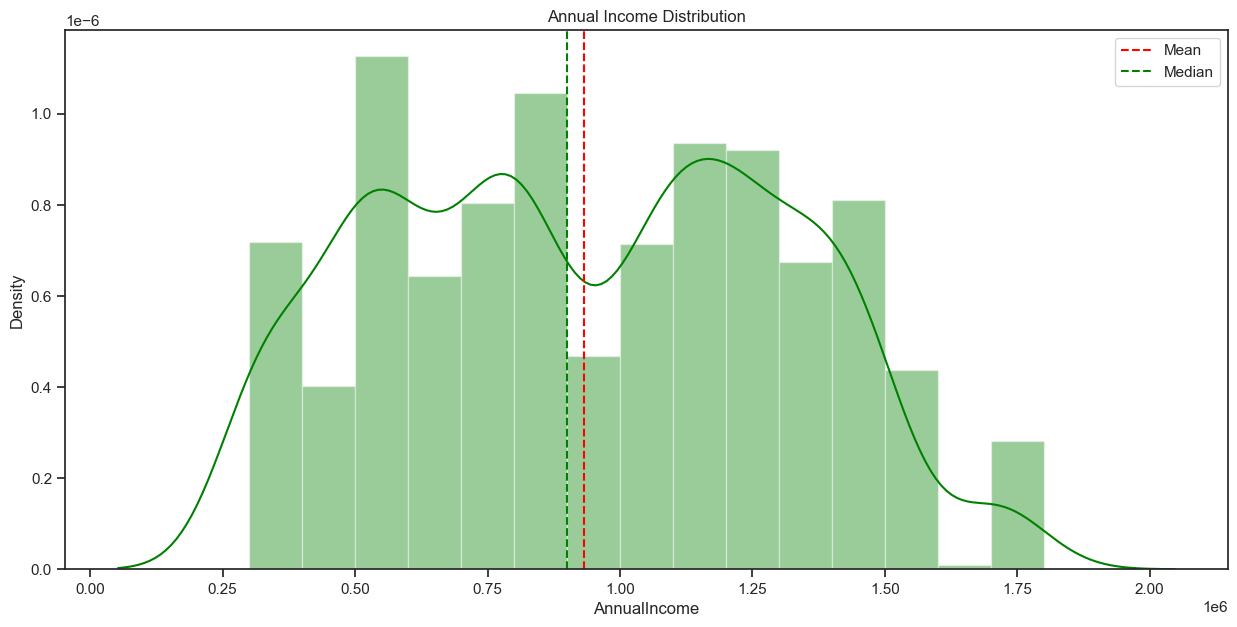

In [11]:
plt.figure(figsize=(15, 7))
_ = sns.distplot(travel_df.AnnualIncome, color="green")
plt.title("Annual Income Distribution")
plt.axvline(travel_df.AnnualIncome.mean(), color="red", linestyle="--", label="Mean")
plt.axvline(
    travel_df.AnnualIncome.median(), color="green", linestyle="--", label="Median"
)
plt.legend()
print("Annual Income mean:", round(travel_df.AnnualIncome.mean(), 2))
print("Annual Income median:", travel_df.AnnualIncome.median())

Observations:
- The distribution is not normal, it is multimodal.
- The mean and median are quite close.
- The annual income range lies between 0.3M and 1.8M rupees.


### 3. Family Members:

Family Members mean: 4.75
Family Members median: 5.0


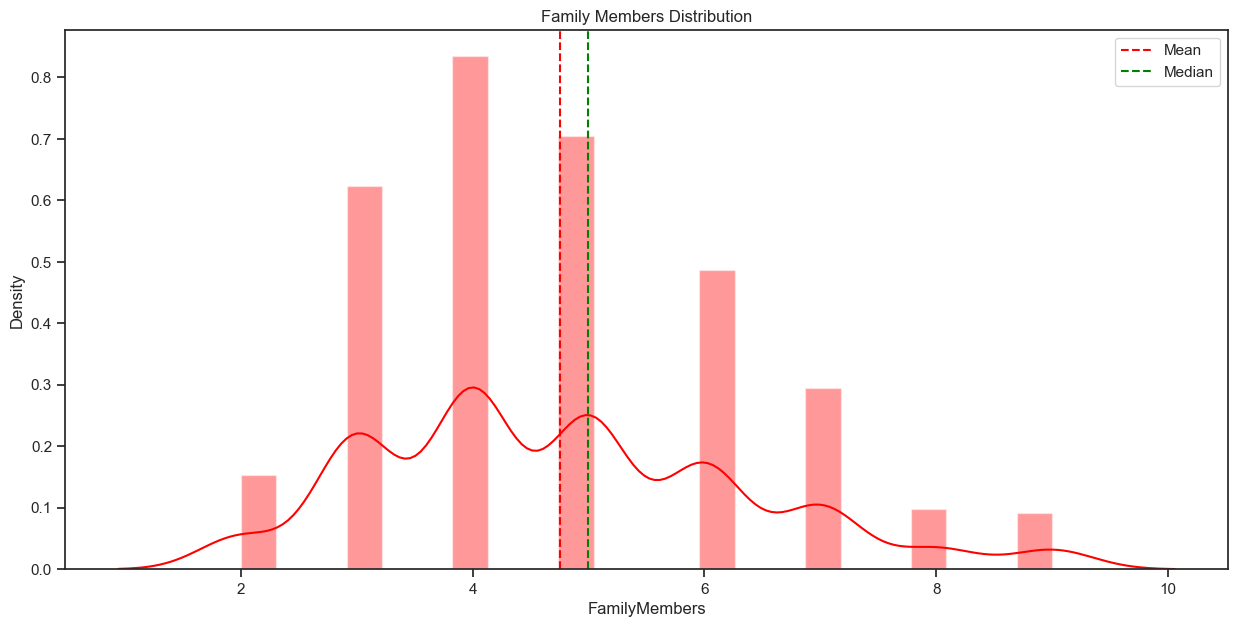

In [12]:
plt.figure(figsize=(15, 7))
_ = sns.distplot(travel_df.FamilyMembers, color="red")
plt.title("Family Members Distribution")
plt.axvline(travel_df.FamilyMembers.mean(), color="red", linestyle="--", label="Mean")
plt.axvline(
    travel_df.FamilyMembers.median(), color="green", linestyle="--", label="Median"
)
plt.legend()
print("Family Members mean:", round(travel_df.FamilyMembers.mean(), 2))
print("Family Members median:", travel_df.FamilyMembers.median())

Observations:
- The distribution is not normal.
- The mean and the median are similar.
- The family members frequency drops shaply after 7 members, because they do not travel as often.
- The range of family members is between 2 and 9.

Let's check the distribution of the categorical features:

Text(0.5, 0.98, 'Categorical Features Count Plots')

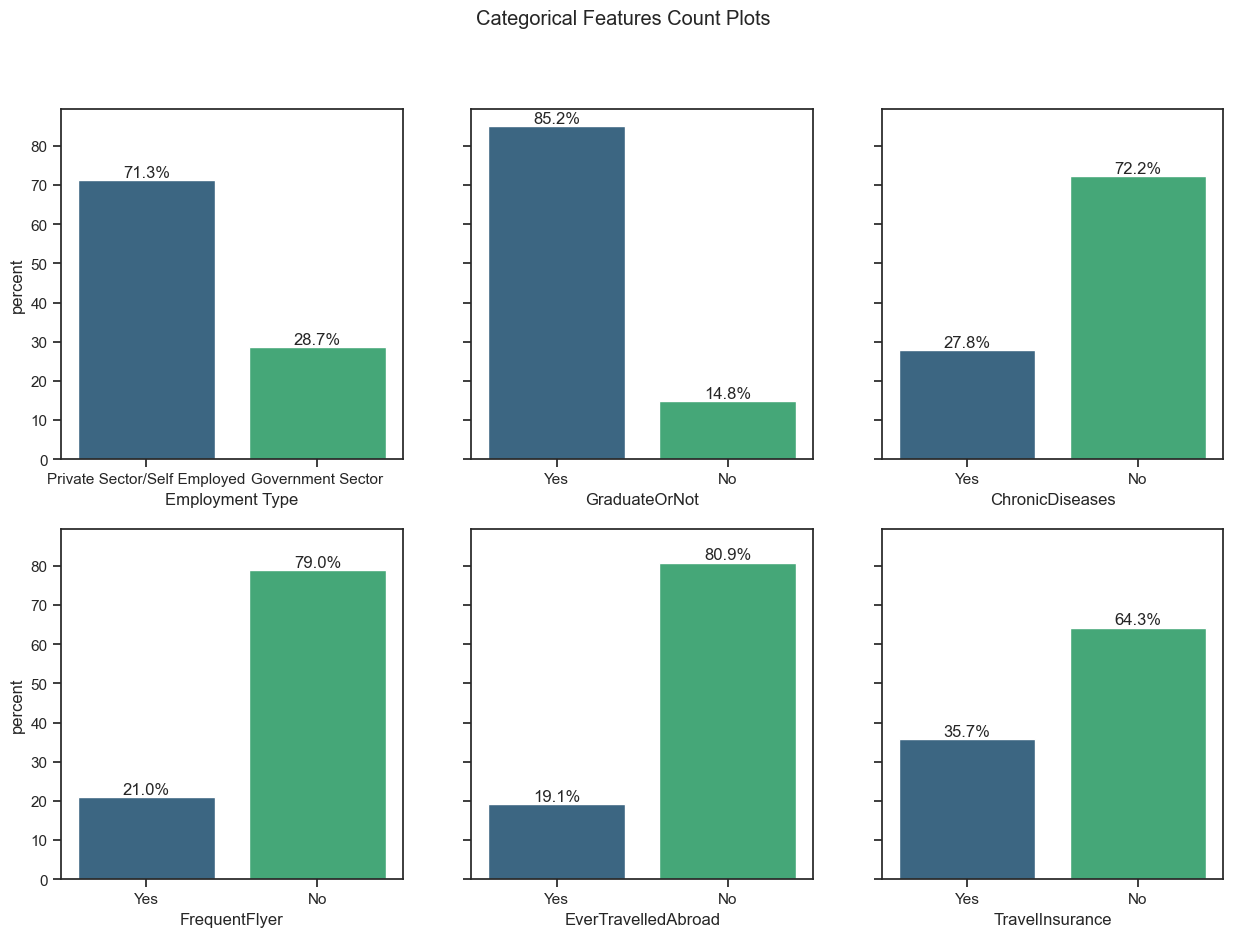

In [13]:
fig, ax = plt.subplots(2, 3, sharey=True, figsize=(15, 10))
for (
    n,
    f,
) in enumerate(categorical_features):
    plt.subplot(2, 3, n + 1)
    fig = sns.countplot(
        data=travel_df,
        x=f,
        palette="viridis",
        stat="percent",
        order=(
            ["Yes", "No"]
            if f != "Employment Type"
            else travel_df[f].value_counts().index.tolist()
        ),
    )
    functions.annotate_bars(fig)

plt.suptitle("Categorical Features Count Plots")

Observations:

**4. Employment Type**: The majority of the individuals in the dataset belong to the Private Sector/Self Employed category. The difference in employment type may have an impact on the likelihood of purchasing travel insurance.

**5. Graduate or Not**: The majority of the individuals in the dataset are graduates. Which in my opinion means that it would not influence the likelihood of buying travel insurance as much. Levels of education are not provided in the dataset, so it is difficutl to envision how it would influence people's decision to buy insurance only based on whether they are graduates or not.

**6. Chronic Diseases**: Surprisingly, the majority of the individuals in the dataset suffer from chronic diseases. These people usually require more medial attention and thus, in my opinion, are more likely to buy travel insurance.

**7. Frequent Flyer**: The majority of the individuals in the dataset are frequent flyers. This is a good sign, as frequent flyers are more likely to travel and thus more likely to buy travel insurance.

**8. Ever Travelled Abroad**: The majority of the individuals in the dataset have travelled abroad. This is a good sign, as people who have travelled abroad are more likely to buy travel insurance.

**9. Travel Insurance**: The proportion of insured people is not as high as that of the non-insured people. From this distribution, we can see that the dataset we have at hand is *imbalanced*, which will affect the performance of the model. We will need to take this into account when training the model.



Let's exclude TravelInsurance from the features and hue for it in the visualizations:

Text(0.5, 0.98, 'Categorical Features Count Plots hued by Travel Insurance')

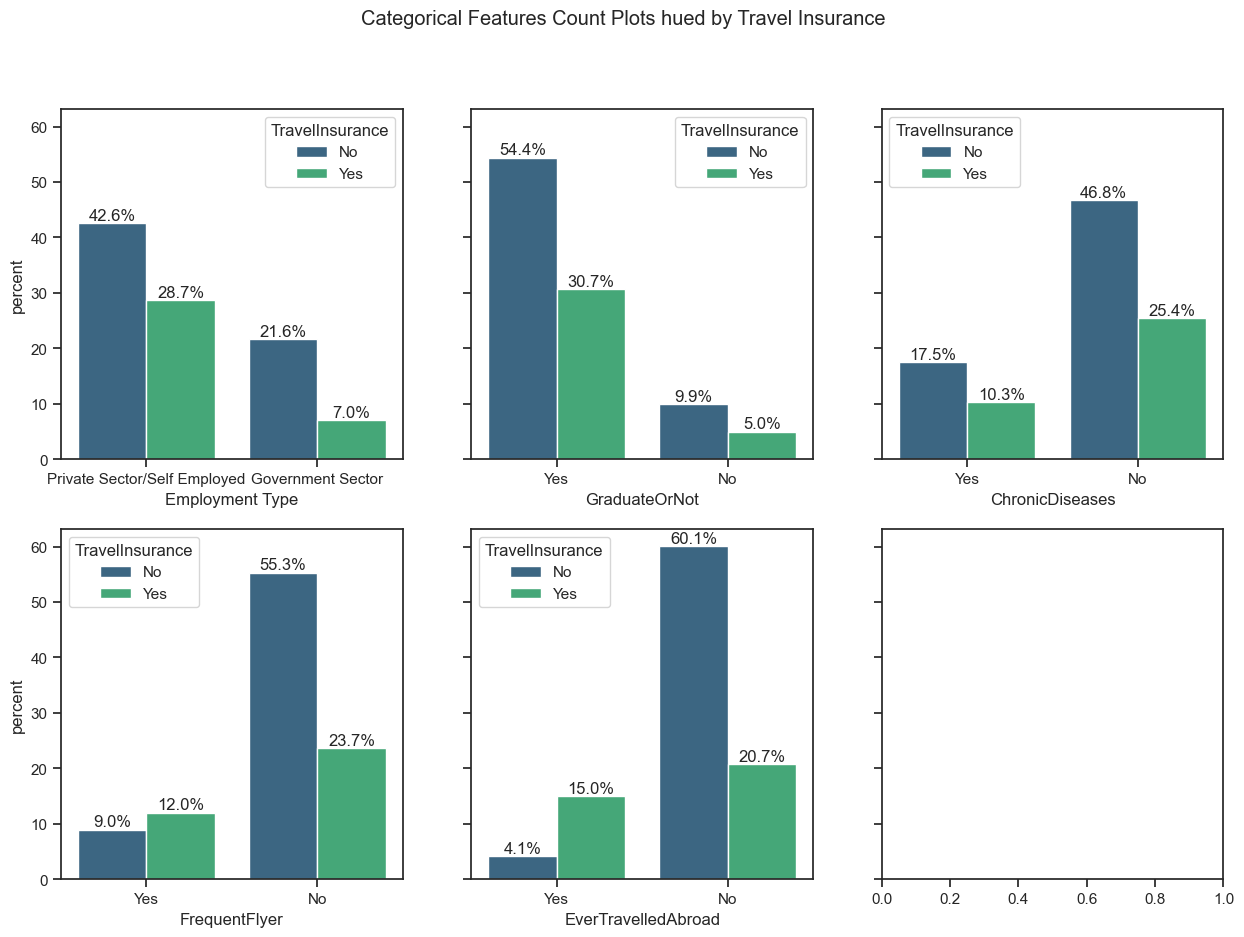

In [14]:
cat = categorical_features.copy()
cat.remove("TravelInsurance")

fig, ax = plt.subplots(2, 3, sharey=True, figsize=(15, 10))
for n, f in enumerate(cat):
    plt.subplot(2, 3, n + 1)
    fig = sns.countplot(
        data=travel_df,
        x=f,
        palette="viridis",
        hue="TravelInsurance",
        order=(
            ["Yes", "No"]
            if f != "Employment Type"
            else travel_df[f].value_counts().index.tolist()
        ),
        stat="percent",
    )
    functions.annotate_bars(fig)

plt.suptitle("Categorical Features Count Plots hued by Travel Insurance")

Observations:

- For the first three columns that were analysed, **Employment Type**, **GraduateOrNot**, **ChronicDIseases**, the ratio of the groups is conserved between people who purchased travel insurance and those who didn't. However for the other two colums that is not the case. 

- There are more Frequent Flyers who purchased travel insurance compared to non-frequent flyers, as there are more people who traveled abroad at least once before who purchase travel insurance compared to those who haven't. I suspect that these features could be good predictors.

Let's check the correlation between the features and the target variable. 

First, I will make a copy of the dataset and convert the categorical variables to numerical ones, so that we can use them in the correlation matrix.

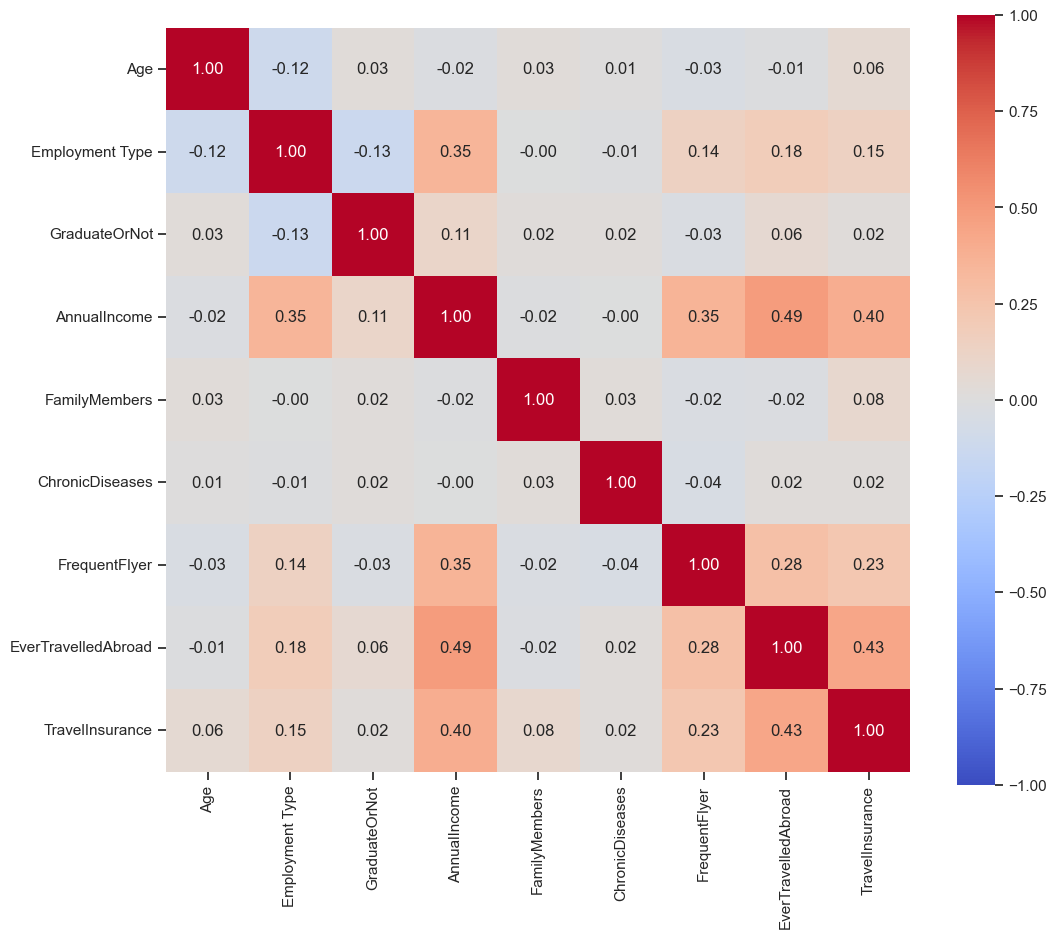

In [15]:
correlation_df = travel_df.copy()
for c in categorical_features:
    if c != "Employment Type":
        correlation_df[c] = correlation_df[c].apply(lambda x: 1 if x == "Yes" else 0)

encode = LabelBinarizer()
correlation_df["Employment Type"] = encode.fit_transform(
    correlation_df["Employment Type"]
)

corr_matrix = correlation_df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
_ = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    vmax=1,
    vmin=-1,
)

Pearson correlation scale:

- 0.00 - 0.19: Very weak correlation
- 0.20 - 0.39: Weak correlation
- 0.40 - 0.59: Moderate correlation
- 0.60 - 0.79: Strong correlation
- 0.80 - 1.00: Very strong correlation

Observations:

- The features that correlate the most with the target variable are `AnnualIncome`, `EverTravelledAbroad`, (moderate positive correlation) and `FrequentFlyer` (weak positive correlation).

- `AnnualIncome` has a moderate positive correlation with `EverTraveledAbroad` which can bring about the issue of multicollinearity.

Let's check if the numerical features are linearly separable from each other for each of the two groups of the target variable (TravelInsurance):

Text(0.5, 1.02, 'Pairplot of Numerical Features hued by Travel Insurance')

<Figure size 2000x1000 with 0 Axes>

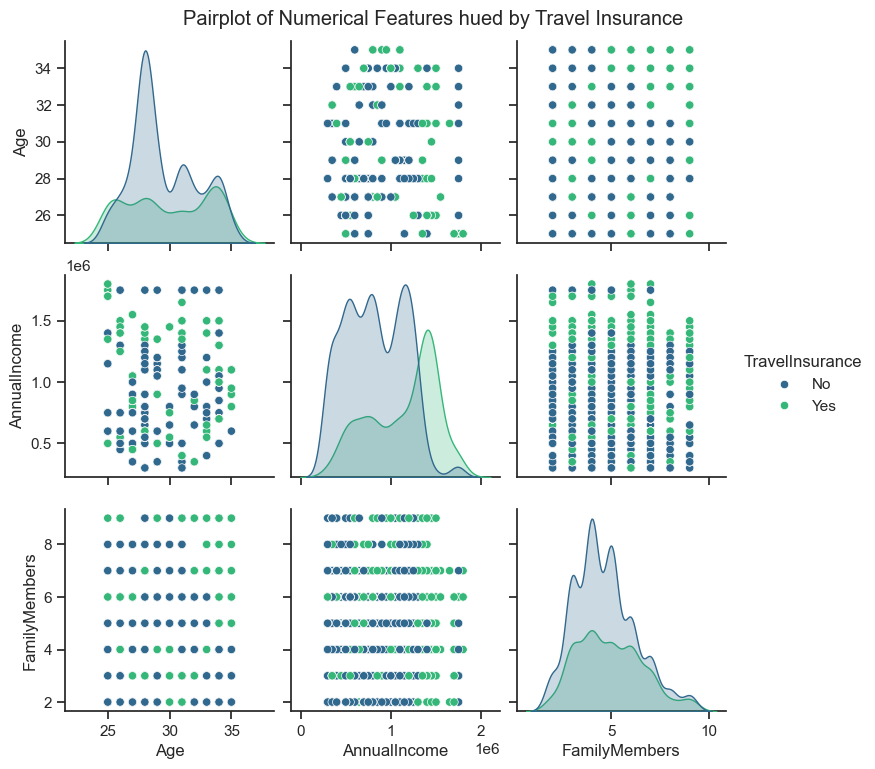

In [16]:
plt.figure(figsize=(20, 10))
_ = sns.pairplot(
    travel_df,
    hue="TravelInsurance",
    vars=numerical_features,
    palette="viridis",
    diag_kind="kde",
)
plt.suptitle("Pairplot of Numerical Features hued by Travel Insurance", y=1.02)

Observations:

From the scatterplots above and the distributions of the numerical features per group of the target variable, I can conclude that the numerical features are not linearly separable. 

There is no clear linear boundary that can visibly separate them from each other. 

This means that we will need to use a more complex model to predict the target variable.

# Feature Engineering

In this section, I will be focusing on two main tasks:

1. Feature selection: I will use Hypothesis Testing to determine which features are statistically significant in predicting the target variable.
2. Feature encoding: I will create a ColumnTransofmer to encode the categorical variables and scale the numerical ones.

### 1. Feature Selection

Let's start with feature selection using Hypothesis Testing.

For this, I will use the Chi-squared test for the discrete features (0/1) and a Mann-Whitney U test for the continuous features, since I saw earlier that the distributions are not normal. 

I will conduct the tests using the copy of the dataset I created earlier; the `correlation_df` DataFrame.

For Categorical features:

- H_0: The feature is not statistically significant in predicting the target variable. The features are independent.
- H_A: The feature is statistically significant in predicting the target variable. The features are dependent.

In [17]:
functions.chi2_test(correlation_df, cat, "TravelInsurance")

Employment Type: Chi2 Statistic = 12.46, p-value = 0.0004
Employment Type is significantly associated with TravelInsurance (p < 0.05)

GraduateOrNot: Chi2 Statistic = 0.11, p-value = 0.7450
GraduateOrNot is not significantly associated with TravelInsurance (p >= 0.05)

ChronicDiseases: Chi2 Statistic = 0.47, p-value = 0.4908
ChronicDiseases is not significantly associated with TravelInsurance (p >= 0.05)

FrequentFlyer: Chi2 Statistic = 84.58, p-value = 0.0000
FrequentFlyer is significantly associated with TravelInsurance (p < 0.05)

EverTravelledAbroad: Chi2 Statistic = 301.55, p-value = 0.0000
EverTravelledAbroad is significantly associated with TravelInsurance (p < 0.05)



Observations:

- The categorical features `Employment Type`, `FrequentFlyer`, `EverTravelledAbroad` and the target variable `Travel Insurance` showcase a relationship between them, as their p-values are less than 0.05. These columns will be used to train the model.

- The categorical features `GraduateOrNot` and `ChronicDiseases` do not have a relationship with the target variable, as their p-values are much greater than 0.05. These columns will not be used to train the model.


Let's consider the numerical features of the dataset:

- H_0: The feature is not statistically significant in predicting the target variable. The features are independent, because there is no difference between the people (exhibiting X feature) who purchased travel insurance and those who didn't.

- H_A: The feature is statistically significant in predicting the target variable. The features are dependent. The features are independent, because there is a considerable difference between the people (exhibiting X feature) who purchased travel insurance and those who didn't.

In [18]:
functions.mann_whitney_test(correlation_df, numerical_features, "TravelInsurance")

Mann-Whitney U test for Age: Statistic=479515.0, p-value=0.030678780881604327
Age is statistically associated with TravelInsurance (p < 0.05).

Mann-Whitney U test for AnnualIncome: Statistic=670230.5, p-value=3.020101045488567e-70
AnnualIncome is statistically associated with TravelInsurance (p < 0.05).

Mann-Whitney U test for FamilyMembers: Statistic=493531.5, p-value=0.0008301993194480642
FamilyMembers is statistically associated with TravelInsurance (p < 0.05).



Observations:

- All the numerical features are statistically significant in predicting the target variable, as their p-values are less than 0.05. This means that there is a difference in the mean value of each feature between the people who purchased travel insurance and those who didn't. 

These columns will be used to train the model. 

Let's consult the confidence intervals using the bootstrap method to reach a conclusion:

In [19]:
functions.calculate_ci(
    correlation_df, numerical_features, "TravelInsurance", method="bootstrap"
)

Age has a significant difference between the two groups: CI_Bootstrap = (0.11, 0.66)
AnnualIncome has a significant difference between the two groups: CI_Bootstrap = (279992.96, 343758.51)
FamilyMembers has a significant difference between the two groups: CI_Bootstrap = (0.12, 0.43)


Let's check the confidence intervals using the analystial method:

In [20]:
functions.calculate_ci(
    correlation_df, numerical_features, "TravelInsurance", method="analytical"
)

Age has a significant difference between the two groups: CI_Analytical = (0.09, 0.66)
AnnualIncome has a significant difference between the two groups: CI_Analytical = (278960.17, 344918.86)
FamilyMembers has a significant difference between the two groups: CI_Analytical = (0.12, 0.42)


Observation: 

- The confidence intervals for the difference in means between the two groups of the target variable do not include 0 in any of the three numerical features, which confirms our earlier finding that the difference in means is statistically significant.

- All three numerical features will be used to train the model.

To conclude, the features that will be used to train the models are going to be chosen using a selecotr:

In [21]:
features_to_use = [
    "Age",
    "AnnualIncome",
    "FamilyMembers",
    "Employment Type",
    "FrequentFlyer",
    "EverTravelledAbroad",
]

selected_df = travel_df[features_to_use + ["TravelInsurance"]].copy()
selected_df

,Age,AnnualIncome,FamilyMembers,Employment Type,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,400000,6,Government Sector,No,No,No
1,31,1250000,7,Private Sector/Self Employed,No,No,No
2,34,500000,4,Private Sector/Self Employed,No,No,Yes
3,28,700000,3,Private Sector/Self Employed,No,No,No
4,28,700000,8,Private Sector/Self Employed,Yes,No,No
...,...,...,...,...,...,...,...
1982,33,1500000,4,Private Sector/Self Employed,Yes,Yes,Yes
1983,28,1750000,5,Private Sector/Self Employed,No,Yes,No
1984,28,1150000,6,Private Sector/Self Employed,No,No,No
1985,34,1000000,6,Private Sector/Self Employed,Yes,Yes,Yes


### 2. Feature Encoding

In [22]:
selected_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1987.0,NaN,NaN,NaN,29.650226,2.913308,25.0,28.0,29.0,32.0,35.0
AnnualIncome,1987.0,NaN,NaN,NaN,932762.959235,376855.684748,300000.0,600000.0,900000.0,1250000.0,1800000.0
FamilyMembers,1987.0,NaN,NaN,NaN,4.752894,1.60965,2.0,4.0,5.0,6.0,9.0
Employment Type,1987,2,Private Sector/Self Employed,1417,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FrequentFlyer,1987,2,No,1570,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EverTravelledAbroad,1987,2,No,1607,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TravelInsurance,1987,2,No,1277,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We have selected 4 categorical features all of which have two categories, and 3 numerical features.

The numerical features need to be scaled as previously mentioned. For this I will be using the `MinMaxScaler` to normalize the numerical features to a range between 0 and 1.

The categorical features need to be encoded into binary columns, so I will use the `OrdinalEncoder` for that as it is designed to deal with multiple columns unlike `LabelBinarizer`.

The desired categorical features need to be selected based on their p values as described above, I will do so using `SelectFpr`.

Let's create a `ColumnTransformer` to achieve that:

In [23]:
cat_selector = Pipeline(
    [
        ("encoder", OrdinalEncoder()),
        ("selector", SelectFpr(score_func=chi2, alpha=0.05)),
    ],
)
preprocessor = ColumnTransformer(
    transformers=[
        (
            "numerical",
            MinMaxScaler(),
            make_column_selector(dtype_include=[np.number]),
        ),
        ("categorical", cat_selector, make_column_selector(dtype_include=object)),
    ]
)

preprocessor

ColumnTransformer(transformers=[('numerical', MinMaxScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x14d219fd0>),
                                ('categorical',
                                 Pipeline(steps=[('encoder', OrdinalEncoder()),
                                                 ('selector',
                                                  SelectFpr(score_func=<function chi2 at 0x123c81620>))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x14e5a56d0>)])

# Model Selection and Training

In this section I will be selecting and training models based on the results of previous analyses. 

I will do so by answering the following questions:

1. Are there enough data points to train a model?
2. Am I predicting a category or a continuous value?
3. Do I have less than 100 thousand data points?
4. Does my dataset contain text data?
5. Is my data linearly separable?

To evaluate the models, I will be using the following metrics:
- Accuracy
- Precision
- Recall
- F1 Score
- ROC AUC Score

In order to better be able to evaluate the performace of the models, **I need to determine what the model is trying to achieve in terms of evaluation metrics**. 

This will depend on the business goal: Is the goal to capture as many customers as possible (high recall) or to minimize the marketing resources and target only those who are most likely to buy (high precision)?

In my opinion, most businesses would like to maximize profit by widening their reach to as many customers as possible, rather than cutting costs by targeting only a specific niche. Therefore, **I will be focusing on maximizing recall**, while keeping precision at a reasonable level.

The main metric that I will be using to evaluate the models is the **`F1 Score`**, as it is a good balance between precision and recall.

### 1. Splitting the train and test data

In [24]:
data = pd.read_csv("TravelInsurancePrediction.csv", index_col=0)
data.ChronicDiseases = data.ChronicDiseases.apply(lambda x: "Yes" if x == 1 else "No")

X = data.drop(columns=["TravelInsurance"])
y = data["TravelInsurance"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1589, 8), (398, 8), (1589,), (398,))

Let's check the distribution of the target variable in the dataset afer splitting it into train and test sets:

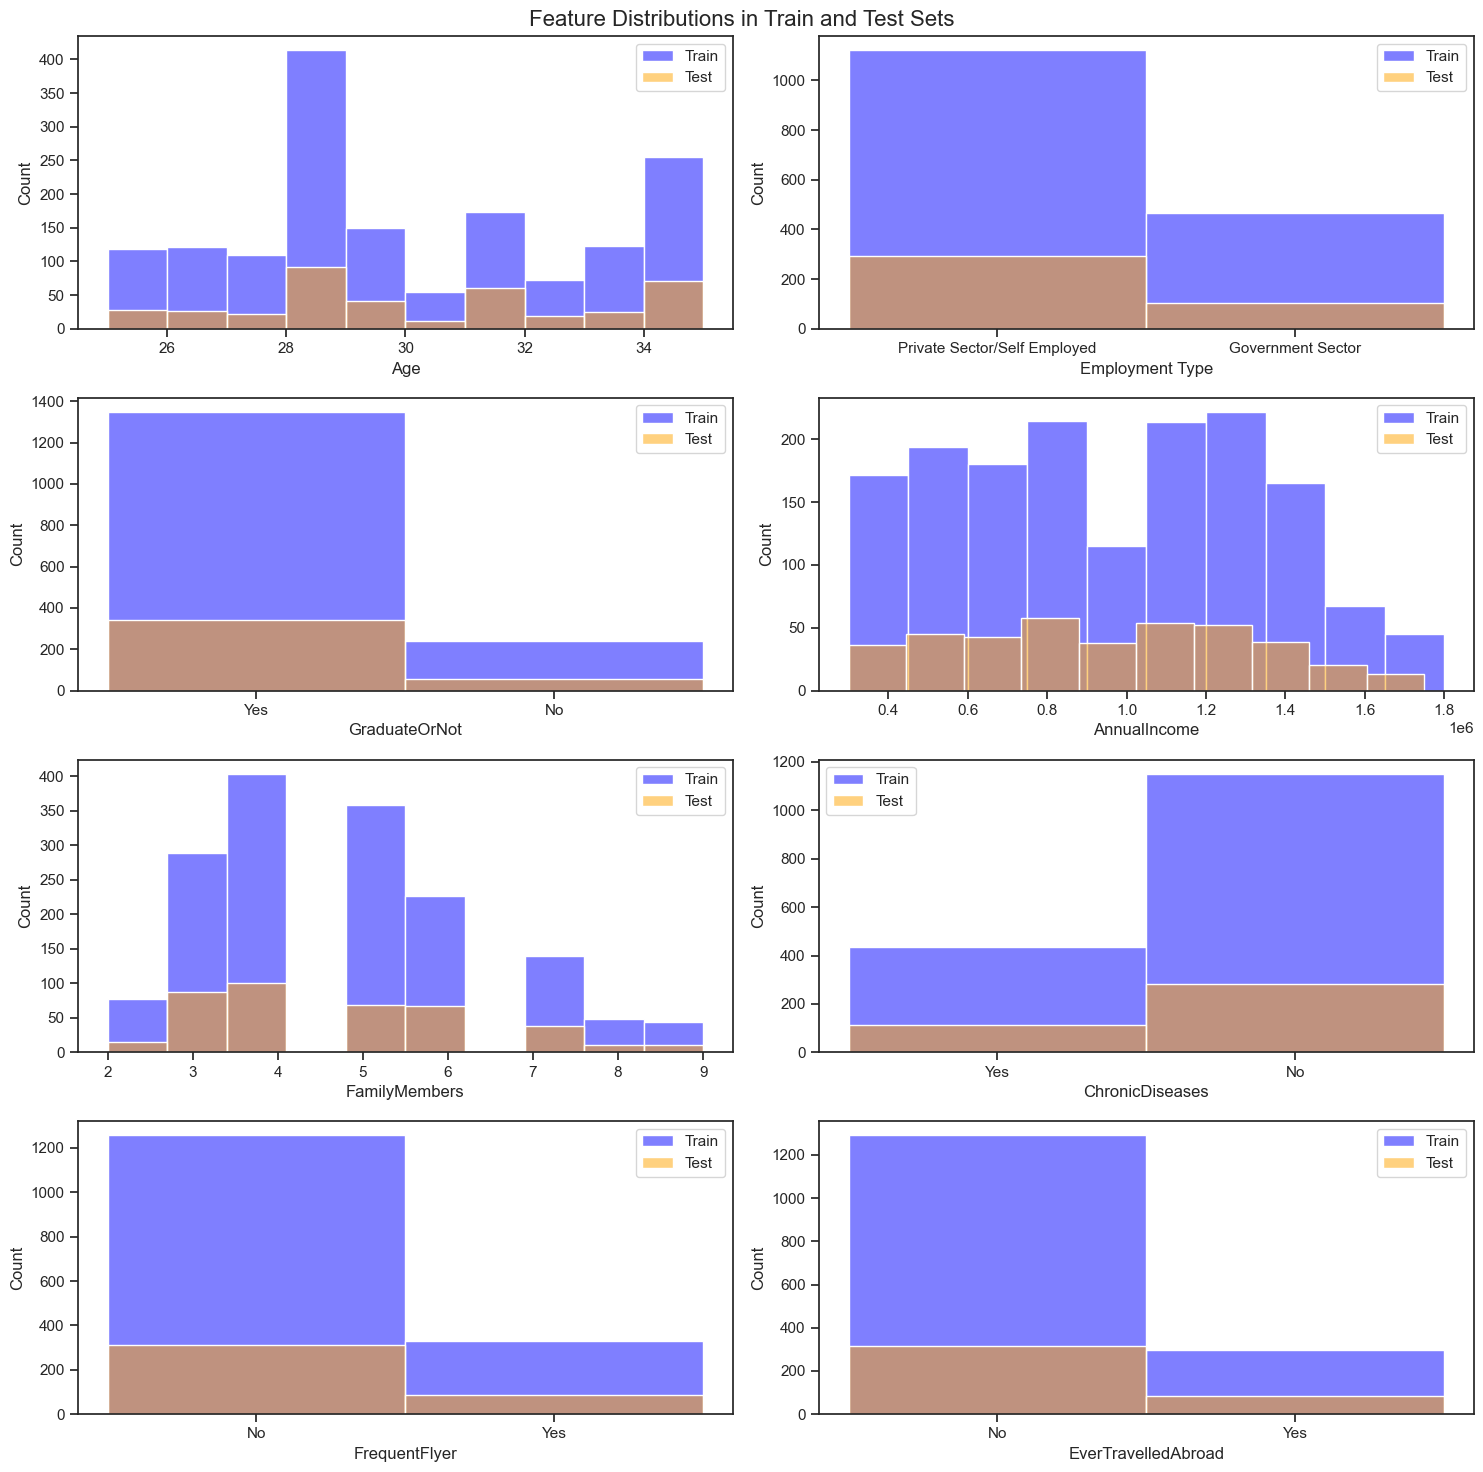

In [25]:
fig, ax = plt.subplots(4, 2, figsize=(15, 15))
plt.suptitle("Feature Distributions in Train and Test Sets", fontsize=16)
for i, col in enumerate(X_train.columns):
    plt.subplot(4, 2, i + 1)
    sns.histplot(X_train[col], color="blue", label="Train", bins=10, alpha=0.5)
    sns.histplot(X_test[col], color="orange", label="Test", bins=10, alpha=0.5)
    plt.tight_layout()
    plt.legend()

Observation: 

The proportions seem to have been preserved correctly in almost all the colums, except for `AnnualIncome` which has a slightly different distribution in the test set compared to the train set., however the difference is very slight.

### 2. Choosing the models

I will be answering the questions above to determine which models to use:
- **Are there enough data points to train a model?** Yes, there are 1987 data points.
- **Am I predicting a category or a continuous value?** I am predicting a category, so I will be using classifiers.
- **Do I have less than 100 thousand data points?** Yes, thus I use an SVM classifier.
- **Does my dataset contain text data?** No, it does not, so I can use a KNN classifier or ensemble models.
- **Is my data linearly separable?** No, it is not, so I will not be uising a linear model, like Logistic Regression.

Based on the answers to the questions above, I will be using the following models:
- **SVM**: kernelized SVM is a good choice for non-linear data.
- **Random Forest**: an ensemble model that can handle non-linear data and is robust to overfitting.
- **Gradient Boosting**: another ensemble model that can handle non-linear data and is robust to overfitting.

In [26]:
models = {
    "SVC": SVC(class_weight="balanced"),
    "Random Forest": RandomForestClassifier(class_weight="balanced", n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(),
}
pipelines = [make_pipeline(preprocessor, model) for model in models.values()]

In [27]:
pipelines[0]

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical', MinMaxScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x14d219fd0>),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder()),
                                                                  ('selector',
                                                                   SelectFpr(score_func=<function chi2 at 0x123c81620>))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x14e5a56d0>)])),
                ('svc', SVC(class_weight='balanced'))])

In [28]:
pipelines[1]

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical', MinMaxScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x14d219fd0>),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder()),
                                                                  ('selector',
                                                                   SelectFpr(score_func=<function chi2 at 0x123c81620>))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x14e5a56d0>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', n_jobs=-1))])

In [29]:
pipelines[2]

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical', MinMaxScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x14d219fd0>),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder()),
                                                                  ('selector',
                                                                   SelectFpr(score_func=<function chi2 at 0x123c81620>))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x14e5a56d0>)])),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

### 3. Training the models and evaluating them

In [30]:
def evaluate_models(models, pipelines, X_train, y_train):
    results = dict()
    y_pred = dict()
    scorers = ["accuracy", "f1", "precision", "recall", "roc_auc"]
    for name, pipeline in zip(models.keys(), pipelines):
        pipeline.fit(X_train, y_train)
        cv_results = cross_validate(
            pipeline,
            X_train,
            y_train,
            cv=5,
            scoring=scorers,
            n_jobs=-1,
        )
        results[name] = cv_results

    compact_results = pd.DataFrame(
        {
            model: {
                metric: np.mean(scores)
                for metric, scores in res.items()
                if metric.startswith("test_")
            }
            for model, res in results.items()
        }
    ).T.sort_values(by=["test_" + scorer for scorer in scorers], ascending=False)

    return pd.DataFrame(results), compact_results


results = evaluate_models(models, pipelines, X_train, y_train)

compact_results = results[1]

results_df = results[0]

results_df

,SVC,Random Forest,Gradient Boosting
fit_time,"[0.024372100830078125, 0.03909897804260254, 0....","[0.08367180824279785, 0.1375570297241211, 0.12...","[0.07597899436950684, 0.08286786079406738, 0.0..."
score_time,"[0.02695488929748535, 0.028821945190429688, 0....","[0.033332109451293945, 0.03699779510498047, 0....","[0.008955717086791992, 0.014687061309814453, 0..."
test_accuracy,"[0.8018867924528302, 0.8333333333333334, 0.779...","[0.7735849056603774, 0.8238993710691824, 0.767...","[0.8364779874213837, 0.8742138364779874, 0.842..."
test_f1,"[0.6666666666666666, 0.7414634146341463, 0.653...","[0.6635514018691588, 0.7543859649122807, 0.666...","[0.7142857142857143, 0.7916666666666666, 0.736..."
test_precision,"[0.8289473684210527, 0.8351648351648352, 0.75,...","[0.7029702970297029, 0.7543859649122807, 0.685...","[0.9420289855072463, 0.9743589743589743, 0.921..."
test_recall,"[0.5575221238938053, 0.6666666666666666, 0.578...","[0.6283185840707964, 0.7543859649122807, 0.649...","[0.5752212389380531, 0.6666666666666666, 0.614..."
test_roc_auc,"[0.7699115044247788, 0.8582301341589268, 0.781...","[0.8182387222102309, 0.848533711730306, 0.7883...","[0.8183898122167061, 0.8785689714482283, 0.784..."


In [31]:
compact_results

,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc
Gradient Boosting,0.840144,0.727864,0.927020,0.600326,0.805096
SVC,0.796716,0.680168,0.779864,0.605620,0.800990
Random Forest,0.779723,0.683587,0.701859,0.667195,0.806734


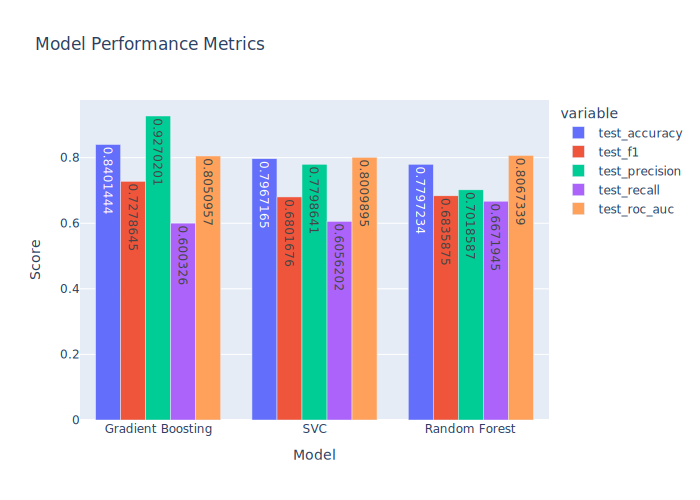

In [32]:
plot_res = compact_results.reset_index()
scorers = ["accuracy", "f1", "precision", "recall", "roc_auc"]
fig = px.bar(
    plot_res,
    x="index",
    y=[f"test_{scorer}" for scorer in scorers],
    title="Model Performance Metrics",
    labels={"index": "Model", "value": "Score"},
    barmode="group",
    text_auto=True,
)

fig

Observations:

- The chosen models perform well, even though they are not optimized yet.
- Gradient Boosting Classifier performs the best, all metrics considered, but it may be overfitting the data.
- SVM Classifier performs better than expected, even though the kernel used is linear.
- Random Forest Classifier performs well, it's recall is even higher than that of the Gradient Boosting Classifier.

# Model Evaluation

### 1. Hyperparameter Tuning

In this section, I will be doing hyperparameter tuning for the three models chosen in the previous section.

Let's note down the distribution of the hyperparameters for each model:

In [33]:
param_dist = {
    "Random Forest": {
        pipelines[1].steps[-1][0] + "__n_estimators": stats.randint(50, 300),
        pipelines[1].steps[-1][0] + "__max_depth": stats.randint(3, 20),
        pipelines[1].steps[-1][0] + "__min_samples_split": stats.randint(2, 20),
        pipelines[1].steps[-1][0] + "__min_samples_leaf": stats.randint(1, 10),
        pipelines[1].steps[-1][0]
        + "__class_weight": ["balanced", "balanced_subsample"],
    },
    "Gradient Boosting": {
        pipelines[2].steps[-1][0] + "__n_estimators": stats.randint(50, 300),
        pipelines[2].steps[-1][0] + "__learning_rate": stats.uniform(0.01, 0.5),
        pipelines[2].steps[-1][0] + "__max_depth": stats.randint(3, 10),
        pipelines[2].steps[-1][0] + "__min_samples_split": stats.randint(2, 20),
        pipelines[2].steps[-1][0] + "__min_samples_leaf": stats.randint(1, 10),
        pipelines[2].steps[-1][0] + "__subsample": stats.uniform(0.5, 0.5),
    },
    "SVC": {
        pipelines[0].steps[-1][0] + "__C": stats.uniform(0.1, 10),
        pipelines[0].steps[-1][0] + "__kernel": ["rbf", "poly"],
        pipelines[0].steps[-1][0] + "__gamma": stats.uniform(0.01, 1),
    },
}

best_models = dict()

for model, pipeline in zip(models.keys(), pipelines):
    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist[model],
        n_iter=50,
        cv=5,
        scoring="recall",
        n_jobs=-1,
        random_state=42,
    )
    search.fit(X_train, y_train)
    best_models[model] = [
        search.best_estimator_,
        search.best_params_,
        search.best_score_,
    ]

best_models = pd.DataFrame(best_models)

best_models

,SVC,Random Forest,Gradient Boosting
0,"(ColumnTransformer(transformers=[('numerical',...","(ColumnTransformer(transformers=[('numerical',...","(ColumnTransformer(transformers=[('numerical',..."
1,"{'svc__C': 3.9867728968948204, 'svc__gamma': 0...",{'randomforestclassifier__class_weight': 'bala...,{'gradientboostingclassifier__learning_rate': ...
2,0.612669,0.656653,0.66367


Let's update the pipelines variable and re-evaluate the models again after hyperparameter tuning:

In [34]:
pipelines_tuned = best_models.iloc[0].to_list()

tuned_results = evaluate_models(models, pipelines_tuned, X_train, y_train)

tuned_results[1]

,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc
Random Forest,0.805535,0.705190,0.771518,0.651374,0.815637
SVC,0.794824,0.680578,0.770766,0.612669,0.793653
Gradient Boosting,0.775950,0.675652,0.702872,0.651452,0.803197


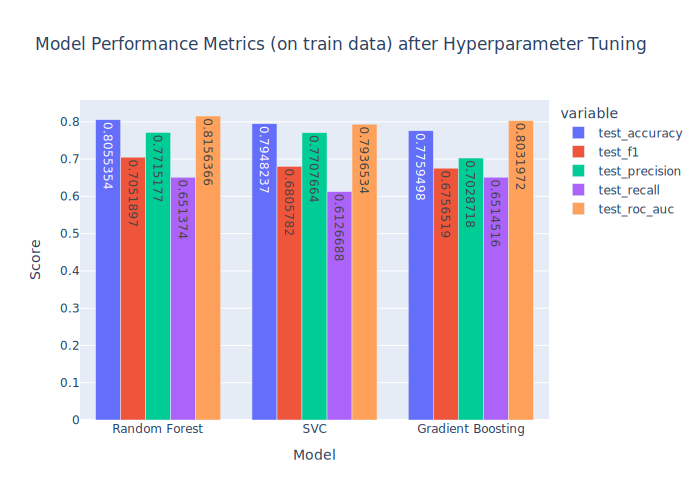

In [35]:
plot_res = tuned_results[1].reset_index()
fig = px.bar(
    plot_res,
    x="index",
    y=[f"test_{scorer}" for scorer in scorers],
    title="Model Performance Metrics (on train data) after Hyperparameter Tuning",
    labels={"index": "Model", "value": "Score"},
    barmode="group",
    text_auto=True,
)

fig

Observations:

- When I optimize the hyperparameters to maximize recall, the behaviour and ranking of the models changes.

    1. **SVM**: This model actually improves very little. The performance accross all metrics is consistent.

    2. **Random Forest**: This model does improve a lot from the randomized search. The f1 score and recall in particular. By far this is the best model for this kind of job.

    3. **Gradient Boosting**: This model actually performs worse when we try to maximize the recall. The default parameters seem to have made it overfit the data.

### 2. Best Model Selection

In my opinion the best model to use would be the Random Forest model, both because of its consistency and the high performance.

Let's check the hyperparameters found to be the best by Randomized Search:

In [36]:
best_pipeline = best_models.iloc[0, 1]

best_models.iloc[1, 1]

{'randomforestclassifier__class_weight': 'balanced',
 'randomforestclassifier__max_depth': 17,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 8,
 'randomforestclassifier__n_estimators': 58}

Let's check the hyperparameters of the second best model, the SVM Classifier:

In [37]:
second_best_pipeline = best_models.iloc[0, 0]

best_models.iloc[1, 0]

{'svc__C': np.float64(3.9867728968948204),
 'svc__gamma': np.float64(0.2813490317738959),
 'svc__kernel': 'rbf'}

### 3. Best Model Evaluation on holdout set

Let's see how the model performs on previously unseen data:

In [38]:
best_predictions = best_pipeline.predict(X_test)

test_scores = {
    "accuracy": accuracy_score(y_test, best_predictions),
    "f1": f1_score(y_test, best_predictions),
    "precision": precision_score(y_test, best_predictions),
    "recall": recall_score(y_test, best_predictions),
    "roc_auc": roc_auc_score(y_test, best_predictions),
}

test_scores_df = pd.DataFrame(test_scores, index=["Random Forest"]).T
test_scores_df

,Random Forest
accuracy,0.798995
f1,0.687500
precision,0.771930
recall,0.619718
roc_auc,0.759078


Let's compare them to the validation test scores:

In [39]:
tuned_results[1].loc["Random Forest"].to_frame()

,Random Forest
test_accuracy,0.805535
test_f1,0.705190
test_precision,0.771518
test_recall,0.651374
test_roc_auc,0.815637


Observation:

All of the scores are quite close to those of the validation test scores, even though they are all lower. I suspect that this arizes from the fact that the holdout dataset is smaller and maybe not as representative, because the data distribution is a bit different (I performed a visual "sanity check" earlier).

Let's have a look at the confusion matrix as well:

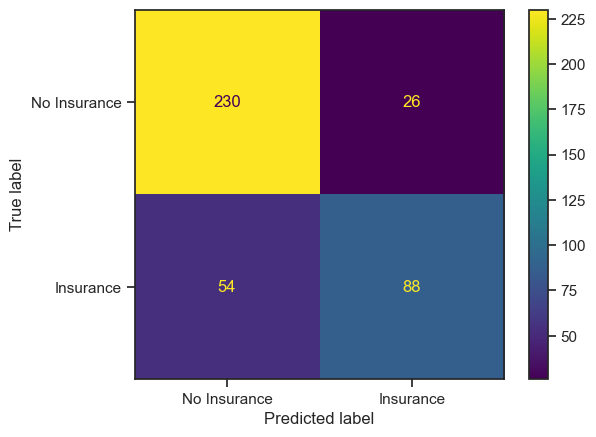

In [52]:
cm = confusion_matrix(y_test, best_predictions)
ConfusionMatrixDisplay(cm, display_labels=["No Insurance", "Insurance"]).plot()

Observations:

- The model performs well on recognising the "no insurance" class, with a very low number of false positives. 

- The model performs somewhat not well on recognising the "insurance" class, with a median value for recall (FN close to TP), and a somewhat high of precision (FP < TP).

- I do not have any suspicion of overfitting, as the model performs well on both the validation and test sets.

- The recall score however is not as high as I would like it to be, which means that the model is not capturing all of the customers who would buy insurance.

Let's check the classification report as well:

In [53]:
class_report = classification_report(y_test, best_predictions, output_dict=True)

class_report_df = pd.DataFrame(class_report).T

class_report_df

,precision,recall,f1-score,support
0,0.809859,0.898438,0.851852,256.000000
1,0.771930,0.619718,0.687500,142.000000
accuracy,0.798995,0.798995,0.798995,0.798995
macro avg,0.790894,0.759078,0.769676,398.000000
weighted avg,0.796327,0.798995,0.793214,398.000000


Observations:

- The model performs very well on the "no insurance" class (0), with a very high precision and recall.

- The model does not perform well enough on the "insurance" class (1):
  - The precision for this class is decent, whith 77% of the predicted insurance buyers being actually buyers.
  - The recall score is quite low, with only about 60% of the actual insurance buyers being correctly predicted, yet 40% of the potential buyers are not being identified.
  - We need to increase the recall score to capture more potential buyers, and thus increase business acquisition.

- When adjusted for class imbalance, we obtain the weighted avarages for all of the scores, which all increase up to a level of about 0.79. With this in mind, the model performs well enough for this kind of classification (In my opinion at least 👀). 

To further understand the model's performance, let's check the feature importances:

<Axes: title={'center': 'Feature Importances from Random Forest Model'}>

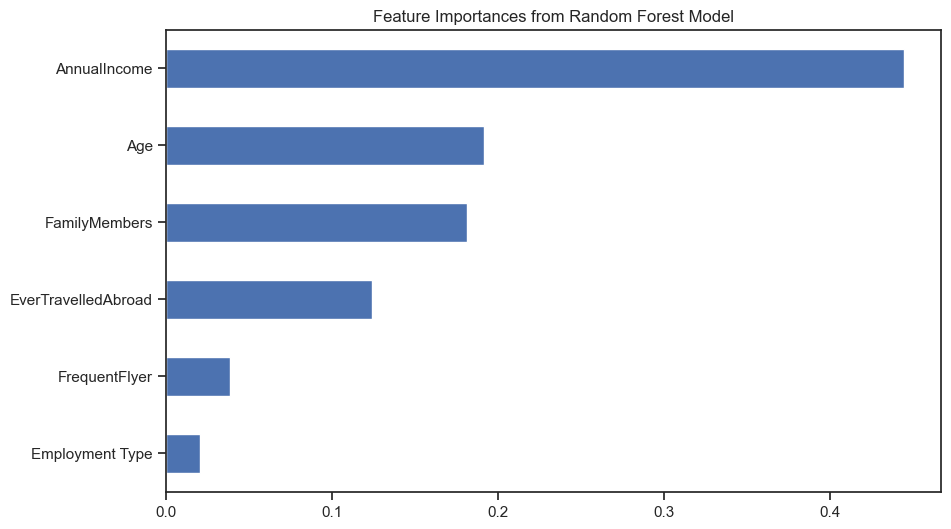

In [ ]:
f_imp = pd.Series(
    best_pipeline.named_steps["randomforestclassifier"].feature_importances_,
    index=[
        x.split("__")[-1] for x in preprocessor.fit_transform(X_train, y_train).columns
    ],
).sort_values()
f_imp.plot(
    kind="barh", figsize=(10, 6), title="Feature Importances from Random Forest Model"
)

Observations:

- The most influential features are the numerical ones especially `AnnualIncome`. This makes sense, as at the end of the day purchasing travel insurance comes down to personal finances and income for most people.

- Among the categorical features, `EverTravelledAbroad` is the most influential one. One would think that having had a history of travelling people are more prone to buying travel insurance.

### 4. Custom threshold optimization

To increase recall, I will widen the models understanding of what a positive case (yes insurance) looks like, by lowering the threshold of what predicted probability is accepted as class 1 instead of using the default 0.5 one.

Let's check the ROC AUC curve to make a decision about our threshold:

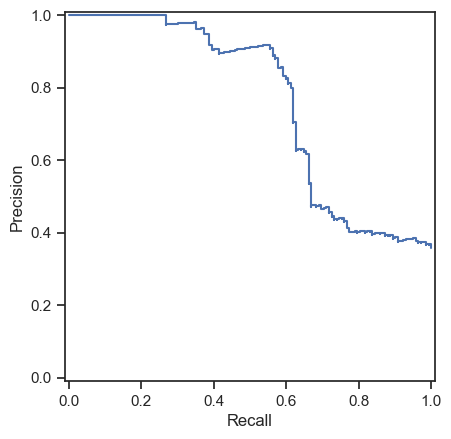

In [43]:
y_proba = best_pipeline.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

PrecisionRecallDisplay(precision=precision, recall=recall).plot()

Given the Precision-Recall curve, it is very hard to make a decision that optimizes both at the same time. However, I would choose a threshold that keeps the recall score above 0.68, given that the precision would be much lower otherwize.

In [44]:
threshold = thresholds[np.argmax(recall <= 0.68)]
threshold

np.float64(0.30626069244794346)

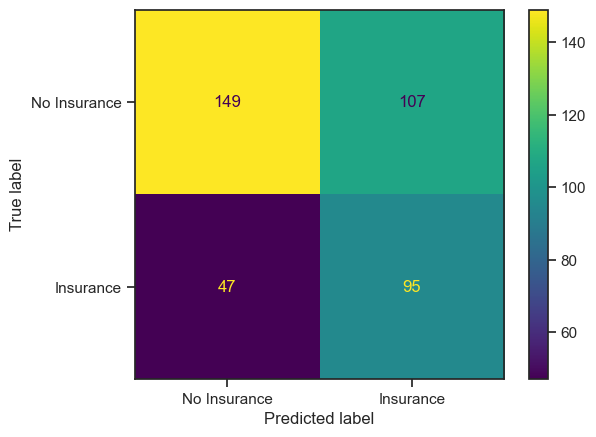

In [45]:
y_pred_thresholded = (y_proba >= threshold).astype(int)
cm_thresholded = confusion_matrix(y_test, y_pred_thresholded)
ConfusionMatrixDisplay(
    cm_thresholded, display_labels=["No Insurance", "Insurance"]
).plot()

In [46]:
pd.DataFrame(classification_report(y_test, y_pred_thresholded, output_dict=True)).T

,precision,recall,f1-score,support
0,0.760204,0.582031,0.659292,256.000000
1,0.470297,0.669014,0.552326,142.000000
accuracy,0.613065,0.613065,0.613065,0.613065
macro avg,0.615251,0.625523,0.605809,398.000000
weighted avg,0.656770,0.613065,0.621128,398.000000


Observations:

- The recall does indeed increease for class 1, however, the accuracy and precision of the classification drop a lot.
- The model with this threshold is therefore not fit for classification.

### 5. Best Model Evaluation on dummy baseline

Let's compare the accuracy score of the best model (Random Forest) to a dummy baseline model that predicts the majority class:

In [47]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
dummy_score = dummy.score(X_test, y_test)
print(f"Dummy Classifier Accuracy: {dummy_score:.4f}")

Dummy Classifier Accuracy: 0.6432


Observations:

- Accuracy-wise, if we were to guess that someone would not buy insurance, we would be right 64% of the time (according to our dataset). Seeing as the Random Forest classifier achieves an accuracy of 80%, it is a significant improvement over the dummy baseline.

- The Random Forest classifier is therefore a good model to use for the task of capturing customers who would buy insurance.

### 5. Model Improvement 

To improve the model, I will try to customize the thresholds of the predicted probabilities to increase the recall score, while keeping the precision at a reasonable level.

# Model Ensembling

In this section, I will be combining the two best models, Random Forest and the SVM with an rbf kernel, to see if we can improve the performance of the model. 

In [48]:
ensembled_model = VotingClassifier(
    estimators=[
        ("SVM", best_models["SVC"].iloc[0]),
        ("Random Forest", best_models["Random Forest"].iloc[0]),
    ],
    voting="hard",
    weights=[1, 1.5],
    n_jobs=-1,
)

ensembled_model.fit(X_train, y_train)
ensemble_pred = ensembled_model.predict(X_test)

ensemble_scores = {
    "accuracy": accuracy_score(y_test, ensemble_pred),
    "f1": f1_score(y_test, ensemble_pred),
    "precision": precision_score(y_test, ensemble_pred),
    "recall": recall_score(y_test, ensemble_pred),
    "roc_auc": roc_auc_score(y_test, ensemble_pred),
}
ensemble_scores_df = pd.DataFrame(ensemble_scores, index=["Ensemble"]).T
ensemble_scores_df

,Ensemble
accuracy,0.806533
f1,0.693227
precision,0.798165
recall,0.612676
roc_auc,0.763369


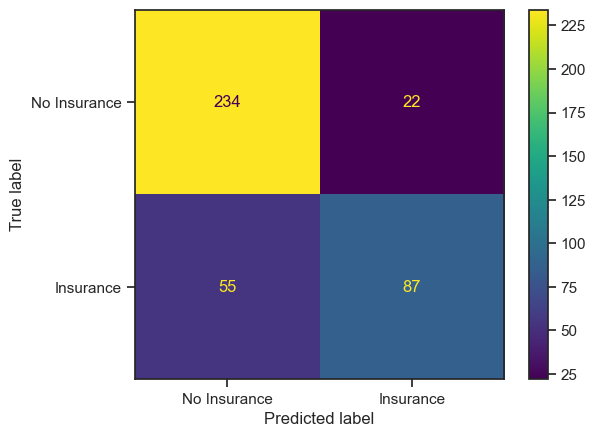

In [49]:
ConfusionMatrixDisplay(
    confusion_matrix(y_test, ensemble_pred),
    display_labels=["No Insurance", "Insurance"],
).plot()

Observations:

- The ensemble performs very similarly to the Random Forest Classifier alone.
- In fact it seems to perform a bit worse at correctly classifying the "no insurance" class.

Let's check the classification report for the ensemble:

In [50]:
ens_class_report = classification_report(y_test, ensemble_pred, output_dict=True)

ens_class_report_df = pd.DataFrame(ens_class_report).T

ens_class_report_df

,precision,recall,f1-score,support
0,0.809689,0.914062,0.858716,256.000000
1,0.798165,0.612676,0.693227,142.000000
accuracy,0.806533,0.806533,0.806533,0.806533
macro avg,0.803927,0.763369,0.775971,398.000000
weighted avg,0.805577,0.806533,0.799672,398.000000


Observations:

- From the classification report I see that the ensemble does not score much better than the Random Forest Classifier for the positive class. In fact the results are only slightly higher.

- The weighted avarages of the scores are also very slightly higher.

- Overall, I would not use an ensemble that combines an SVM with a Random Forest classifier for this task. Perhaps an XGBoost model would be better suited.

## Summary and Conclusion

Through this analysis of the travel insurance dataset, I explored the key characteristics and behaviors of customers that influence the purchase of travel insurance, developed predictive models, and identified actionable insights for the business.

**Key Findings:**

- **Demographics and Customer Profile:**  
  The dataset consists of 1,987 customers aged 25 to 35, with the majority employed in the private sector or self-employed. Most customers are college graduates, and the average annual income is approximately 932,763 rupees. Family sizes range from 2 to 9 members, with a median of about 5.

- **Target Variable Distribution:**  
  The purchase of travel insurance is imbalanced, with a significant majority of customers (about 64%) not purchasing insurance. This class imbalance has implications for model selection and evaluation.

- **Feature Importance and Predictors:**  
  Exploratory analysis and feature selection techniques highlighted several important predictors for travel insurance uptake:
  - **EverTravelledAbroad** and **FrequentFlyer**: Customers who have previously traveled abroad or are frequent flyers are much more likely to purchase travel insurance.
  - **Annual Income**: Higher income is positively correlated with insurance purchase. Richer people tend to buy insurance more often.
  - **ChronicDiseases**: Customers with chronic diseases are usually assumed to have a tendency to buy insurance, possibly due to perceived risk. However, the data suggests that this way of thinking is false and that there is no change in the likelihood of purchasing insurance based on having a chronic disease or not.
  - **Age**: There was no linear trend in age influencing insurance purchase, but judging from the distribution curve, older customers (above 33) are slightly more likely to buy insurance, while younger customers (below 28) are less likely to do so.
  - **Employment Type**: People employed in the private sector or self-employed are more likely to purchase insurance, while those in government jobs or students are less likely.
  - **Family Members**: The number of family members does not show a strong correlation with insurance purchase, yet larger families tend to on avarage buy insurance more often than smaller families.
  - **GraduateOrNot**: This feature does not show a significant relationship with insurance purchase, suggesting that having a diploma or not isn't a strong predictor in this context.

- **Modeling and Performance:**  
  Multiple machine learning models were evaluated, with Random Forest emerging as the best performer:
  - Initial model achieved 79% accuracy and balanced performance across metrics
  - Hyperparameter tuning improved recall while maintaining other metrics
  - Random Forest outperformed both SVM and Gradient Boosting classifiers
  - Model showed robust generalization with similar performance on validation and test sets
  
  **Threshold Optimization:**
    - Attempted to improve recall by adjusting classification threshold to 0.68
    - While recall improved, precision dropped significantly
    - The trade-off was deemed unfavorable as it reduced overall model utility
  
  **Model Ensembling:**
    - Combined Random Forest with SVM using weighted voting
    - Ensemble did not improve upon Random Forest's performance
    - Showed slightly worse performance in classifying the "no insurance" class
    - Demonstrated that model complexity doesn't always lead to better results

- **Business Insights:**  
  - Customers with international travel history or frequent flyer status represent high-value segments for targeted marketing.
  - Income and age group can be leveraged to personalize offers and increase conversion rates.
  - Addressing class imbalance, either through resampling or tailored evaluation metrics, is crucial for deploying models in production.

**Next Steps and Recommendations:**

- Collecting additional features related to travel habits, risk perception, or previous insurance claims is needed to further improve predictive power.
- I would suggest exploring more advanced techniques for handling class imbalance, such as SMOTE or cost-sensitive learning.